# MFCC 변환

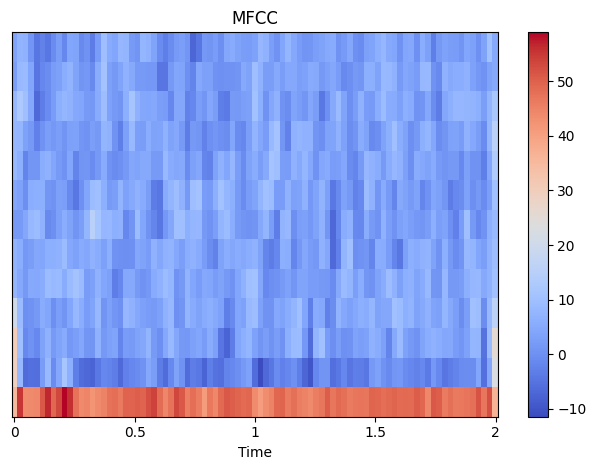

MFCC shape: (13, 87)


In [13]:
import numpy as np
import librosa
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import numpy as np
import librosa

# 임의의 넘파이 행렬 생성 (44100 샘플)
input_matrix = np.random.rand(44100)

# MFCC로 변환하는 함수 정의
def compute_mfcc(input_matrix, sr=44100, n_mfcc=13):
    # input_matrix를 모노로 변환
    if input_matrix.ndim > 1:
        input_matrix = np.mean(input_matrix, axis=1)

    # MFCC 계산
    mfccs = librosa.feature.mfcc(y=input_matrix, sr=sr, n_mfcc=n_mfcc)

    return mfccs

# MFCC 계산
mfcc_features = compute_mfcc(input_matrix)

# MFCC 특징 시각화
#plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_features, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

print("MFCC shape:", mfcc_features.shape)


# Spectrogram 변환

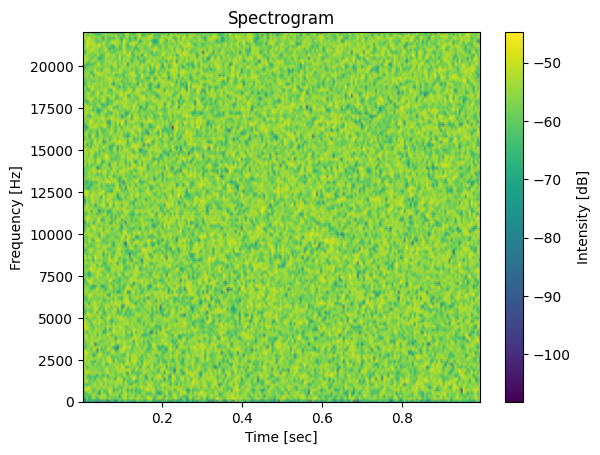

In [7]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 임의의 넘파이 행렬 생성
input_matrix = np.random.rand(44100)  # 44100 샘플의 임의의 오디오 데이터 생성

# 스펙트로그램 계산
frequencies, times, spectrogram = signal.spectrogram(input_matrix, fs=44100)

# 스펙트로그램 시각화
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()


# Mel spectrogram 변환

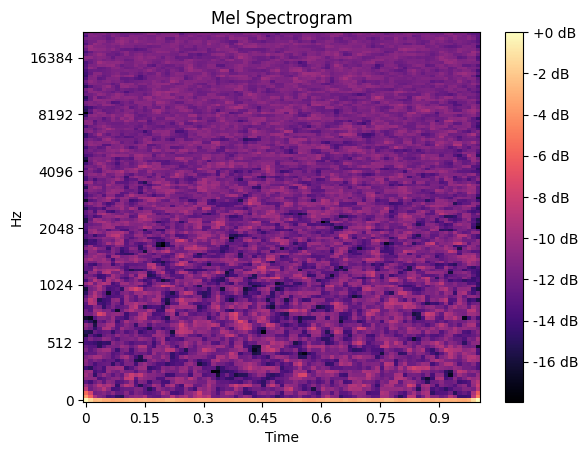

In [8]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 임의의 넘파이 행렬 생성
input_matrix = np.random.rand(44100)  # 44100 샘플의 임의의 오디오 데이터 생성

# 스펙트로그램 계산
spectrogram = np.abs(librosa.stft(input_matrix))

# Mel 스펙트로그램 변환
mel_spectrogram = librosa.feature.melspectrogram(S=spectrogram)

# Mel 스펙트로그램 시각화
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=44100, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


# Mel spectrogram + power to db visualization

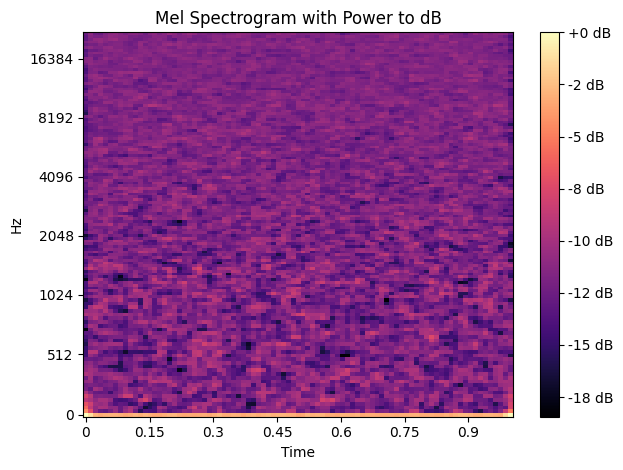

In [12]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 임의의 넘파이 행렬 생성
input_matrix = np.random.rand(44100)  # 44100 샘플의 임의의 오디오 데이터 생성

# 스펙트로그램 계산
spectrogram = np.abs(librosa.stft(input_matrix))

# Mel 스펙트로그램 변환
mel_spectrogram = librosa.feature.melspectrogram(S=spectrogram)

# power_to_db를 적용하여 데시벨로 변환
db_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Mel 스펙트로그램 및 power_to_db 변환 결과 시각화
#plt.figure(figsize=(10, 4))
librosa.display.specshow(db_mel_spectrogram, sr=44100, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram with Power to dB')
plt.tight_layout()
plt.show()
